In [1]:
# fore data manipulation
import numpy as np
import pandas as pd

import sys

# for visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# to display plot in the notebook
%matplotlib inline

# for splitting data
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
# checking the versions of the libraries
libraries = [['Numpy', np],['Pandas', pd],['Matplotlib', matplotlib],['seaborn', sns],['sklearn', sklearn]]
for i in libraries:
    print('{0} Version: {1}'.format(i[0], i[1].__version__))
print("Python:", sys.version)

Numpy Version: 1.14.2
Pandas Version: 0.20.3
Matplotlib Version: 2.1.0
seaborn Version: 0.8.0
sklearn Version: 0.19.1
Python: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]


# Data Cleaning and Formatting

In [3]:
# Reading the data into a dataframe
data = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# to print all the columns
pd.set_option('display.max_columns', 60)

# displaying the top 50 rows
data.head(50)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [91]:
# shape of the dataframe
print("Number of rows {}\nNumber of columns {}".format(data.shape[0], data.shape[1]))

Number of rows 11746
Number of columns 60


# Data Types and Missing Values

As we can see their are no null values in the data. but, from the above we can see that many columns has value 'Not Avalible' which needs to be converted to np.nan.

In [19]:
# checking for column data types and missing value columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [5]:
# replacing all 'Not Available' with np.nan
data = data.replace({'Not Available': np.nan})

# Converting the columns to correct data type
for col in list(data.columns):
    for st in ['ft²', 'Score', 'kBtu', 'kWh', 'therms', 'gal', 'Metric Tons CO2e']:
        if st in col:
            data[col] = data[col].astype(float)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11735 non-null object
NYC Building Identification Number (BIN)                      11584 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     207 non-null object
Postal Code                                            

In [7]:
# Statistics for numeric columns
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

In [8]:
# statistics for the missing data 
def summary_of_missing_data(df):
    
    # null value count for each column
    null_cols = df.isnull().sum()
    
    # % null values for each column
    null_percent = df.isnull().sum()*100 / len(df)
    
    # result table
    table = pd.concat([null_cols, null_percent], axis = 1)
    
    # column renaming
    table.columns = ['Null value count', '% of null values']
    
    # removing columns with 0 null values
    table = table[table['Null value count'] != 0]
    
    # Sorting values
    table = table.sort_values(by = ['% of null values'], ascending = False)
    
    print('Number of columns with missing values {}'.format(table.shape[0]))
    
    return table
    


In [9]:
summary_of_missing_data(data)

Number of columns with missing values 46


,Null value count,% of null values
Fuel Oil #1 Use (kBtu),11737,99.923378
Diesel #2 Use (kBtu),11730,99.863783
Address 2,11539,98.237698
Fuel Oil #5 & 6 Use (kBtu),11152,94.942959
District Steam Use (kBtu),10810,92.031330
Fuel Oil #4 Use (kBtu),10425,88.753618
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.365912
3rd Largest Property Use Type,10262,87.365912
Fuel Oil #2 Use (kBtu),9165,78.026562
2nd Largest Property Use Type,8005,68.150860


In [10]:
missing_table = summary_of_missing_data(data)

# removing the columns with has more then 50% of missing data
missing_cols = list(missing_table[missing_table['% of null values'] > 50].index)

# removing those columns
data = data.drop(list(missing_cols), axis = 1)

print('Number of columns droped {}'.format(len(missing_cols)))

Number of columns with missing values 46
Number of columns droped 11


# Exploratory Data Analysis

## Single Variable Plots ( Univariate Analysis)

Text(0.5,1,'Distribution of Energy Star')

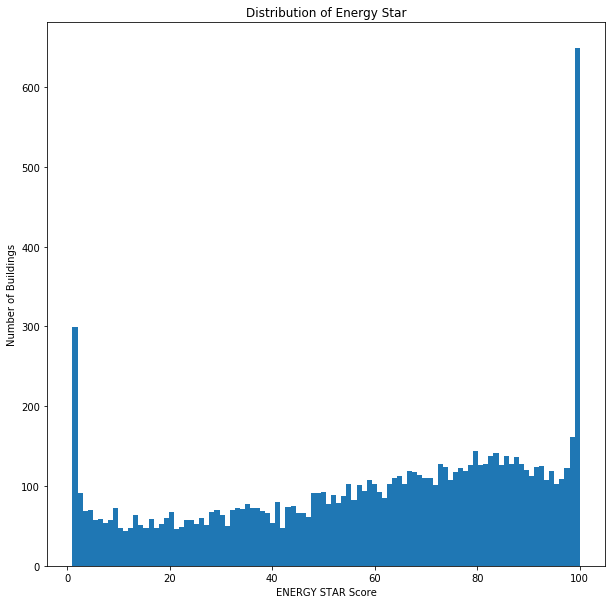

In [11]:
# Checking the range of values
data['ENERGY STAR Score'].describe()

# histogram
plt.figure(figsize = (10,10))
plt.hist(data['ENERGY STAR Score'].dropna(), bins = 100)
plt.xlabel('ENERGY STAR Score')
plt.ylabel('Number of Buildings')
plt.title('Distribution of Energy Star')


In [12]:
# Checking the range of values
data['Site EUI (kBtu/ft²)'].describe()

# from the table it is clear that the data has outliers

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

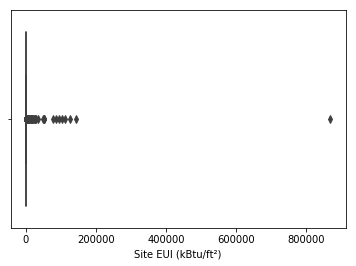

In [13]:
sns.boxplot(x = data['Site EUI (kBtu/ft²)'])

In [14]:
len(data[data['Site EUI (kBtu/ft²)'] > 150]) 

644

Almost 96 % of the data ranges between 0 to 150. It is clear that the data has outliers

# Removing of Outliers

In [15]:
# Caculating first and third quartile
first_Q = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_Q = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Caculating Interquartile range
IQR = third_Q - first_Q

# Removal of outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_Q - 3 * IQR)) &
            (data['Site EUI (kBtu/ft²)'] < (third_Q + 3 * IQR))]

Text(0.5,1,'Distribution of Sit EUI')

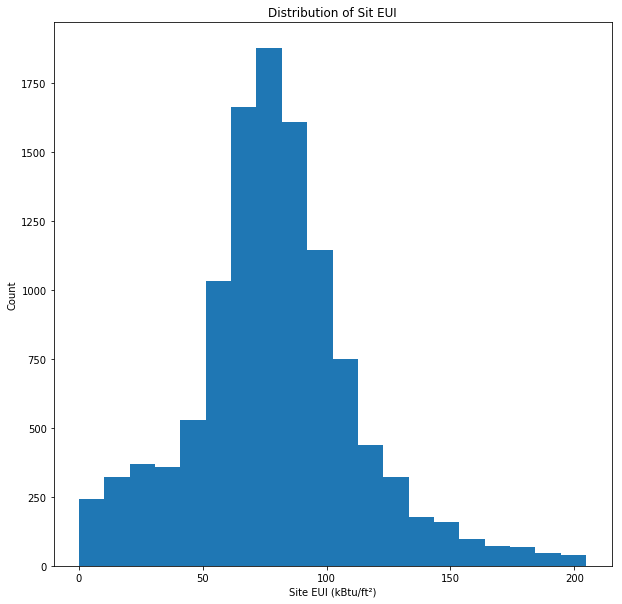

In [16]:
# Histogram Plot of Site EUI
plt.figure(figsize = (10,10))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20)
plt.xlabel('Site EUI (kBtu/ft²)')
plt.ylabel('Count')
plt.title('Distribution of Sit EUI')



## Categorical Variables

In [17]:
# extracting catagorical values and their unique values

def categorical_discription(df):
    
    # catagorical columns
    cat_col = list(df.select_dtypes(include=['object']).columns)
    
    # unique values 
    unique_values = list(len(df[i].unique()) for i in cat_col)
    
    # table
    table = pd.concat([pd.Series(cat_col), pd.Series(unique_values)], axis = 1)
    
    # columns
    table.columns = ['Categories', 'Unique Values']
    
    return table
       

In [18]:
categorical_discription(data)

,Categories,Unique Values
0,Property Name,11315
1,Parent Property Id,94
2,Parent Property Name,95
3,BBL - 10 digits,11228
4,"NYC Borough, Block and Lot (BBL) self-reported",11228
5,NYC Building Identification Number (BIN),11125
6,Address 1 (self-reported),11244
7,Postal Code,278
8,Street Number,4114
9,Street Name,1994


## Finding the relation between score and categorical variables

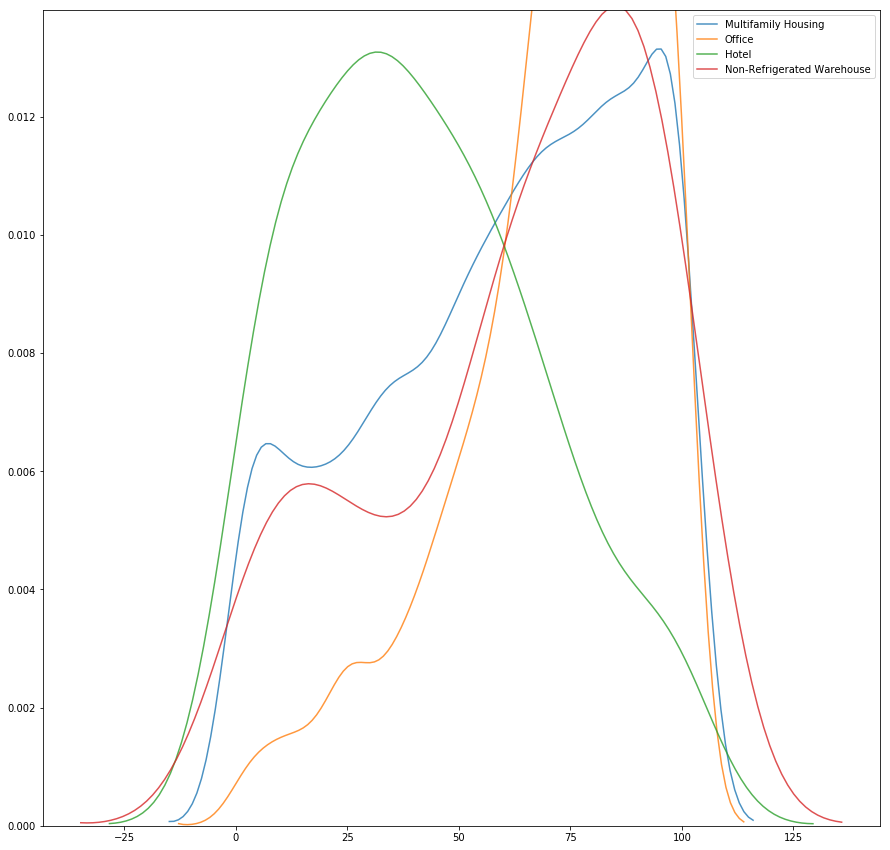

In [19]:

# Plot of distribution of scores for Primary Property Type - Self Selected
plt.figure(figsize = (15,15))

col = ['Primary Property Type - Self Selected']

for i in col:
    List = data.dropna(subset = ['ENERGY STAR Score'])
    List = List[i].value_counts()
    List = list(List[List.values > 100].index)
    
    for ls in List:
        # Select the building type
        subset = data[data[i] == ls]
    
        # Density plot of Energy Star scores
        sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = ls, shade = False, alpha = 0.8)

From the above graph we can infer that property type has some influence on the energy star score 

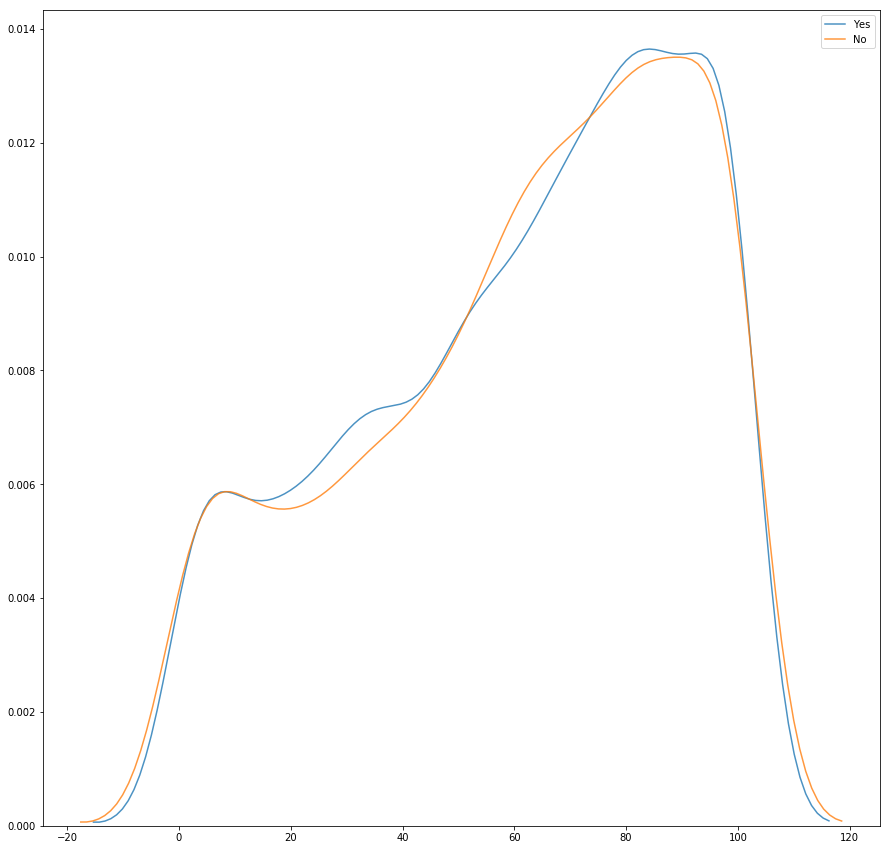

In [122]:
# Plot of distribution of scores for Water Required?
plt.figure(figsize = (15,15))

col = ['Water Required?']

for i in col:
    List = data.dropna(subset = ['ENERGY STAR Score'])
    List = List[i].value_counts()
    List = list(List[List.values > 10].index)
    
    for ls in List:
        # Select the building type
        subset = data[data[i] == ls]
    
        # Density plot of Energy Star scores
        sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = ls, shade = False, alpha = 0.8)
        
# Water required? column has no effect on Energy star score

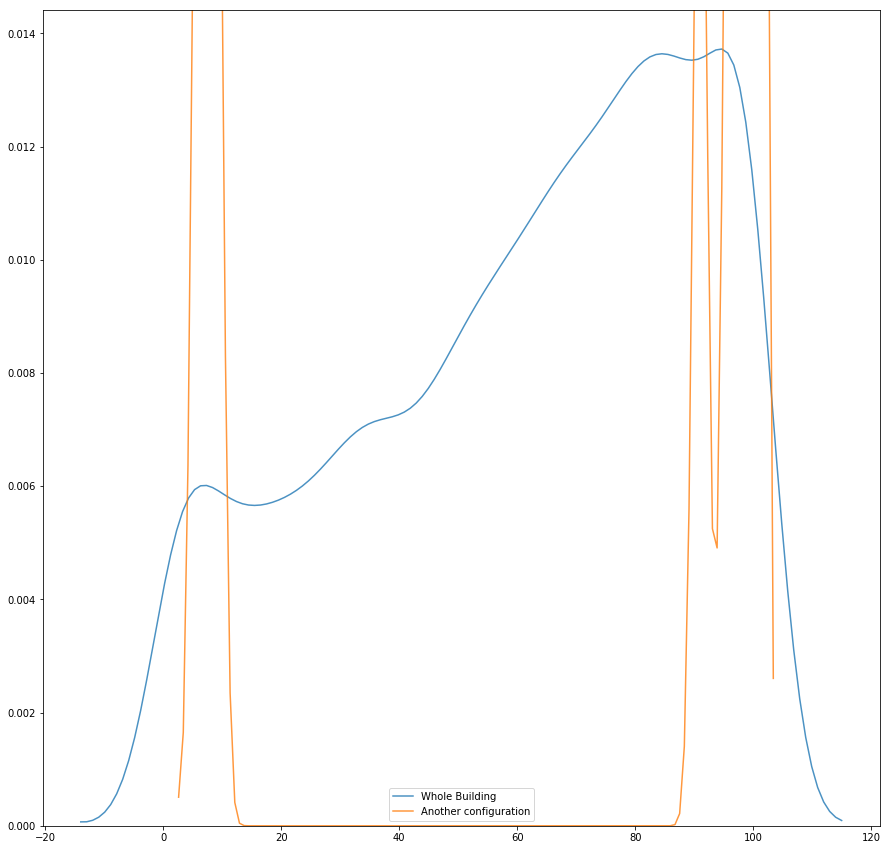

In [146]:

# Plot of distribution of scores for Metered Areas (Energy)
plt.figure(figsize = (15,15))

col = ["Metered Areas (Energy)"]

for i in col:
    List = data.dropna(subset = ['ENERGY STAR Score'])
    List = List[i].value_counts()
    List = list(List[List.values > 1].index)
    
    for ls in List:
        # Select the building type
        subset = data[data[i] == ls]
    
        # Density plot of Energy Star scores
        sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = ls, shade = False, alpha = 0.8)

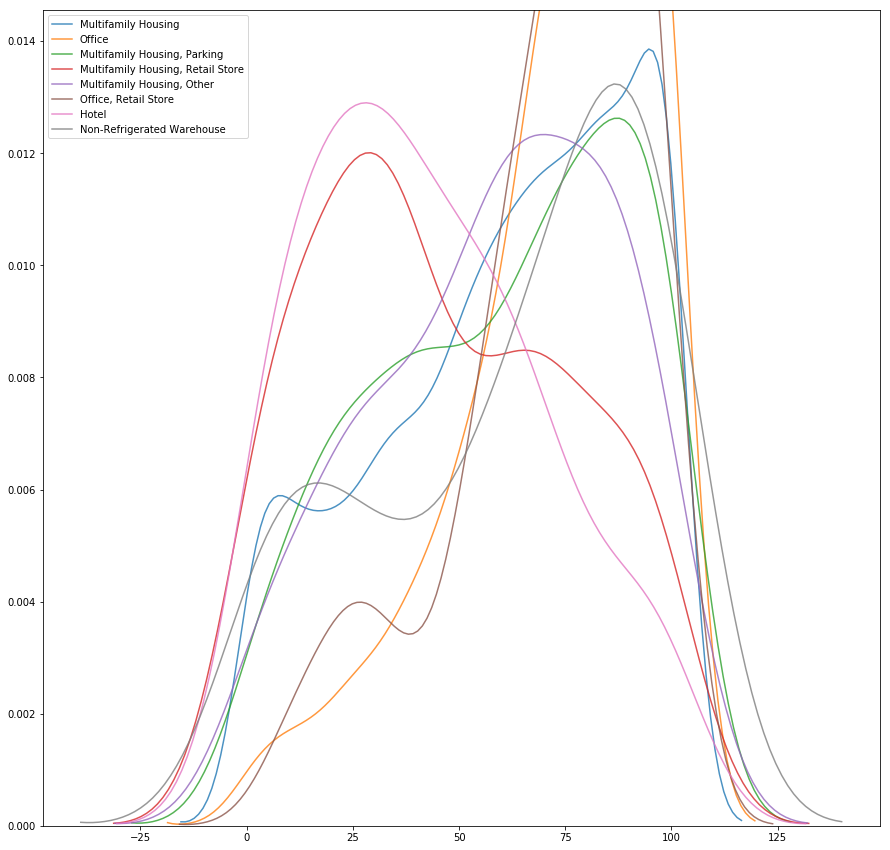

In [126]:

# Plot of distribution of scores for List of All Property Use Types at Property
plt.figure(figsize = (15,15))

col = ["List of All Property Use Types at Property"]

for i in col:
    List = data.dropna(subset = ['ENERGY STAR Score'])
    List = List[i].value_counts()
    List = list(List[List.values > 100].index)
    
    for ls in List:
        # Select the building type
        subset = data[data[i] == ls]
    
        # Density plot of Energy Star scores
        sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = ls, shade = False, alpha = 0.8)

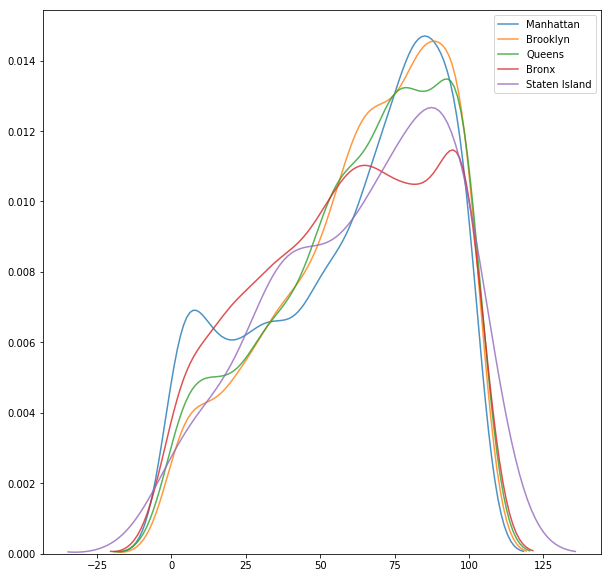

In [107]:
# Plot of distribution of scores for Borough
plt.figure(figsize = (10,10))

col = ['Borough']

for i in col:
    List = data.dropna(subset = ['ENERGY STAR Score'])
    List = List[i].value_counts()
    List = list(List[List.values > 100].index)
    
    for ls in List:
        # Select the building type
        subset = data[data[i] == ls]
    
        # Density plot of Energy Star scores
        sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = ls, shade = False, alpha = 0.8);

From the above graph we can infer that Borough does not have much influence on the energy star score

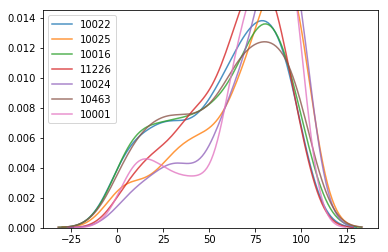

In [108]:
# Plot of distribution of scores for Postal Code
plt.figure(figsize = (20,10))
%matplotlib inline

col = ['Postal Code']

for i in col:
    List = data.dropna(subset = ['ENERGY STAR Score'])
    List = List[i].value_counts()
    List = list(List[List.values > 180].index)
    
    for ls in List:
        # Select the building type
        subset = data[data[i] == ls]
    
        # Density plot of Energy Star scores
        sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = ls, shade = False, alpha = 0.8);
        
# we can see even postal code has very little effect on th energy star score

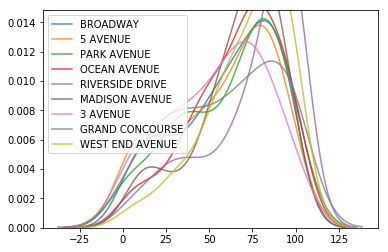

In [151]:

col = ['Street Name']

for i in col:
    List = data.dropna(subset = ['ENERGY STAR Score'])
    List = List[i].value_counts()
    List = list(List[List.values > 100].index)
    
    for ls in List:
        # Select the building type
        subset = data[data[i] == ls]
    
        # Density plot of Energy Star scores
        sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = ls, shade = False, alpha = 0.8);

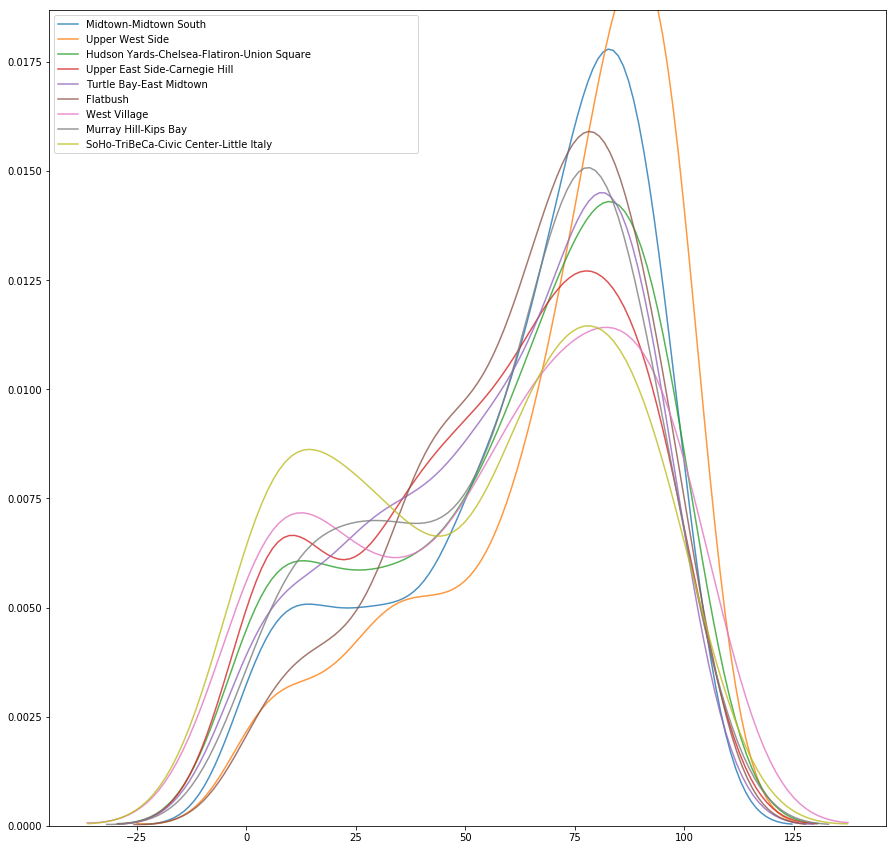

In [159]:
plt.figure(figsize = (15,15))
col = ['NTA']

for i in col:
    List = data.dropna(subset = ['ENERGY STAR Score'])
    List = List[i].value_counts()
    List = list(List[List.values > 150].index)
    
    for ls in List:
        # Select the building type
        subset = data[data[i] == ls]
    
        # Density plot of Energy Star scores
        sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = ls, shade = False, alpha = 0.8);

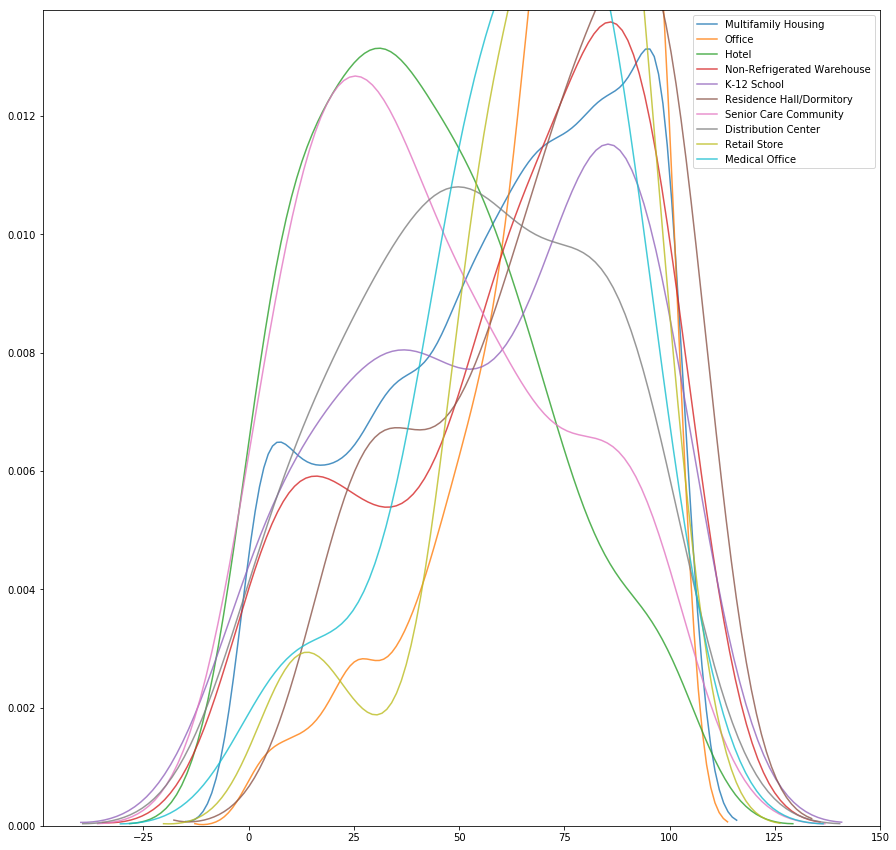

In [173]:

plt.figure(figsize = (15,15))
col = ['Largest Property Use Type']

for i in col:
    List = data.dropna(subset = ['ENERGY STAR Score'])
    List = List[i].value_counts()
    List = list(List[List.values > 15].index)
    
    for ls in List:
        # Select the building type
        subset = data[data[i] == ls]
    
        # Density plot of Energy Star scores
        sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = ls, shade = False, alpha = 0.8);

In [20]:
# finding the correlation between X and the Energy star score
cor = data.corr()['ENERGY STAR Score'].sort_values()

print(cor.head(), '\n')
print(cor.tail())


Site EUI (kBtu/ft²)                                       -0.723864
Weather Normalized Site EUI (kBtu/ft²)                    -0.713993
Weather Normalized Source EUI (kBtu/ft²)                  -0.645542
Source EUI (kBtu/ft²)                                     -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)   -0.358394
Name: ENERGY STAR Score, dtype: float64 

Largest Property Use Type - Gross Floor Area (ft²)    0.018330
Order                                                 0.036827
Community Board                                       0.056612
Council District                                      0.061639
ENERGY STAR Score                                     1.000000
Name: ENERGY STAR Score, dtype: float64


From the above we can see that site EUI, Weather Normalized Site, source EUI, source EUI are negitively correlated to score which make sence because EUI is the amount of energy used by a building divided by the square footage of the buildings and is meant to be a measure of the efficiency of a building with a lower score being better.

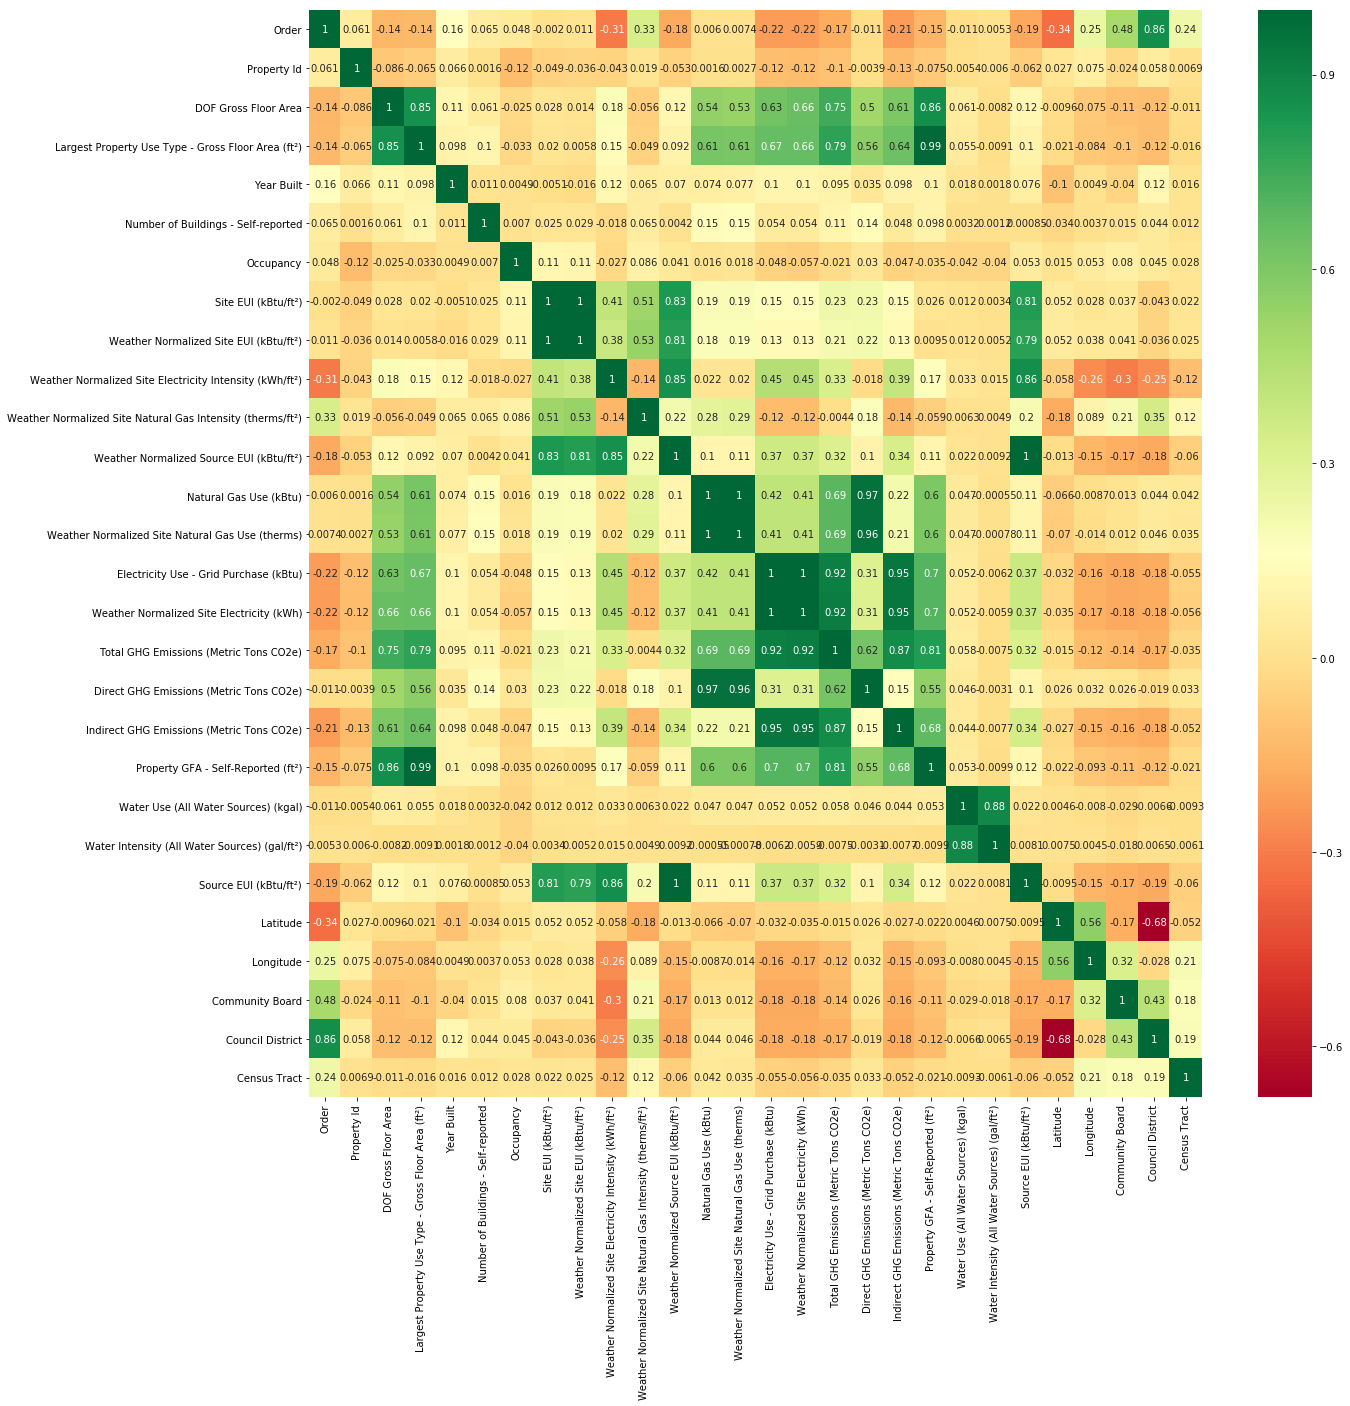

In [21]:
x = data.drop(['ENERGY STAR Score'], axis = 1)
corrmat = x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From the above heat map we can find some X values are highly correlated. It is better to remove highly correlated columns.

In [22]:
# Droping of highly correlated columns

# Create correlation matrix
corr_matrix = x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
data = data.drop(to_drop, axis=1)


In [23]:
data.shape

(11319, 37)

## Handling Categorical Data

In [136]:
cat = catagorical_discription(data)
cat

,Catagories,Unique Values
0,Property Name,11315
1,Parent Property Id,94
2,Parent Property Name,95
3,BBL - 10 digits,11228
4,"NYC Borough, Block and Lot (BBL) self-reported",11228
5,NYC Building Identification Number (BIN),11125
6,Address 1 (self-reported),11244
7,Postal Code,278
8,Street Number,4114
9,Street Name,1994


In [24]:
# from above graphs it is clear that some categorical variables don't have any effect on score
# parent property name is removed because we are including parent property id
# Property Name, BBL - 10 digits, NYC Borough, Block and Lot (BBL) self-reported, NYC Building Identification Number (BIN),
# Address 1 (self-reported) are removed because the number of rows and number of unique values are almost same

cat_drop = ['NTA', 'Street Name', 'Postal Code', 'Borough', 'Water Required?', 'DOF Benchmarking Submission Status',
            'Parent Property Name', 'Property Name', 'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported',
           'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)']

data = data.drop(cat_drop, axis = 1)

In [25]:
# droping the categorical columns in which more then 80% of values belong to same class

drop = ['Street Number', 'Metered Areas (Energy)', 'Metered Areas  (Water)']

data = data.drop(drop, axis = 1)

As we cannot use datatime as it is. we will try extracting month and year from the date

In [26]:
data['Release Date'] = pd.to_datetime(data['Release Date'])
data['Year'] = data['Release Date'].dt.year
print(data['Year'].value_counts())
data['Month'] = data['Release Date'].dt.month

2017    11319
Name: Year, dtype: int64


As we only have 2017 in the year so we can drop the year 

In [27]:
data = data.drop(['Year', 'Release Date'], axis = 1)

In [28]:
data['Month'] = data['Month'].astype('object')

In [29]:
data.select_dtypes(include = ['object']).columns

Index(['Parent Property Id', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type', 'Month'],
      dtype='object')

some of the categories has many categorical levels which would be difficult to handle while converting it to dummies. So we will convert less frequent categories to 'others'.

In [30]:
def low_frequent_convertor(df, col, thr):
    d = pd.DataFrame(df[col].value_counts() < int(thr))
    def blah(i):
        if i in d.index[d[col] == True].tolist():
            return True
        else:
            return False
    con = df[col].apply(blah)
    df.loc[con, col] = 'Others'


In [31]:
low_frequent_convertor(data, 'Primary Property Type - Self Selected', 100)
low_frequent_convertor(data, 'List of All Property Use Types at Property', 100)
low_frequent_convertor(data, 'Largest Property Use Type', 100)
low_frequent_convertor(data, 'Month', 50)

In [32]:
cat_cols = data.select_dtypes(include = ['object']).columns.tolist()

In [33]:
cat_cols

['Parent Property Id',
 'Primary Property Type - Self Selected',
 'List of All Property Use Types at Property',
 'Largest Property Use Type',
 'Month']

In [305]:
cat_cols = data.select_dtypes(include = ['object']).columns.tolist()
df_with_dummies = pd.get_dummies(data, prefix='Category_', columns=cat_cols)

## Split Into Training and Testing Sets

In [323]:
final = df_with_dummies[df_with_dummies['ENERGY STAR Score'].notnull()]

In [324]:
X = final.drop(['ENERGY STAR Score'], axis = 1)
y = final['ENERGY STAR Score']

In [325]:
print(X.shape, y.shape)

(9461, 143) (9461,)


In [338]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [339]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7568, 143)
(1893, 143)
(7568,)
(1893,)


## Establish a Baseline

naive baseline is guessing the output with the mean or median values of the output. which will be the baseline which we will use to compare our ML model.

In [328]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [332]:
baseline_guess = np.median(y_test)

print('The baseline guess for energy star score is {}'.format( baseline_guess))
print("Baseline Performance on the test set: MAE = {}".format(  mae(y_test, baseline_guess)))

The baseline guess for energy star score is 67.0
Baseline Performance on the test set: MAE = 24.875330163761227


## Exporting the test and train data to csv

In [340]:
X_train.to_csv('X_train.csv',index= False)
X_test.to_csv('X_test.csv',index= False)
y_train.to_csv('y_train.csv',index= False)
y_test.to_csv('y_test.csv',index= False)